In [ ]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import cv2
print(tf.__version__)

2.7.0


In [ ]:
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
path="/gdrive/My Drive"
categories=["with_mask","without_mask"]

In [ ]:
#for category in categories:
 # image_pathh=os.path.join(path,category)
  #for image in os.listdir(image_pathh)[:2]:
   # image_path=os.path.join(image_pathh,image)
    #array=cv2.imread(image_path)
#    array=cv2.cvtColor(array,cv2.COLOR_BGR2RGB)
 #   array=cv2.resize(array,(224,224))
  #  plt.imshow(array)
   # print(array.shape)
    #print("image_array:",array)

In [ ]:

train_data=[]
x_train_data=[]
y_train_data=[]
for i in categories:
  sub=os.path.join(path,i)
  indexes=categories.index(i)
  for image in os.listdir(sub):
    image_src=os.path.join(sub,image)
    arrays=cv2.imread(image_src)
    print("done")
    array=cv2.cvtColor(arrays,cv2.COLOR_BGR2RGB)
    array=cv2.resize(array,(224,224))
    train_data.append([array,indexes])

import random
random.shuffle(train_data)

for features,label in train_data:
  x_train_data.append(features)
  y_train_data.append(label)


x_train_data=np.array(x_train_data).reshape(-1,224,224,3)
x_train_data=x_train_data/255
y_train_data=np.array(y_train_data)
len(x_train_data)
len(y_train_data)







In [ ]:
x_train=x_train_data[:1500]
x_test=x_train_data[1500:]
y_train=y_train_data[:1500]
y_test=y_train_data[1500:]

In [ ]:
y_train

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
import keras
from keras import layers 
from keras.layers import Dense,Activation,Flatten,Conv2D,MaxPool2D,Dropout
from keras.models import Sequential



In [ ]:
model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(5,5),padding="Same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=16,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(1,activation="sigmoid"))
#optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.99)
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
history=model.fit(x_train,y_train,epochs=8,validation_data=(x_test,y_test))

Epoch 1/8
47/47 [==============================] - 62s 1s/step - loss: 0.4272 - accuracy: 0.8627 - val_loss: 0.1193 - val_accuracy: 0.9978
Epoch 2/8
47/47 [==============================] - 60s 1s/step - loss: 0.0203 - accuracy: 0.9960 - val_loss: 0.0205 - val_accuracy: 1.0000
Epoch 3/8
47/47 [==============================] - 60s 1s/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0256 - val_accuracy: 0.9933
Epoch 4/8
47/47 [==============================] - 60s 1s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0146 - val_accuracy: 1.0000
Epoch 5/8
47/47 [==============================] - 60s 1s/step - loss: 9.5451e-04 - accuracy: 1.0000 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 6/8
47/47 [==============================] - 60s 1s/step - loss: 6.2736e-04 - accuracy: 1.0000 - val_loss: 0.0076 - val_accuracy: 1.0000
Epoch 7/8
47/47 [==============================] - 60s 1s/step - loss: 3.3338e-04 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 0.9978
Epoch 8/8
47/47

In [ ]:
model.save("/drive/My Drive/my_model.h5")

In [ ]:
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
import numpy as np
import keras
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

#cascade_path = "/home/alex/Downloads/haarcascade_frontalface_default.xml"
model_param = "/content/drive/MyDrive/my_model.h5"
#name = "face_mask_detection"
new_model = keras.models.load_model(model_param)



predictions: [[0.60785204]]


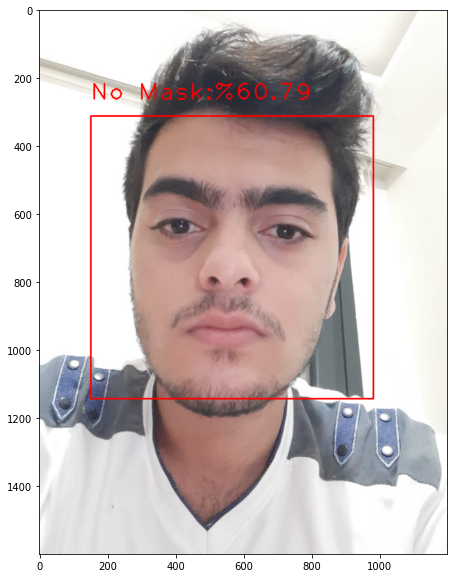

In [ ]:
frame=cv2.imread("/content/drive/MyDrive/emiroğlu/burkay/AGTL3865.JPG")
face = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
faces = face.detectMultiScale(frame, 1.3, 5)
for x, y, w, h in faces:
  roi_face = frame[y:y + h, x:x + w]
  final_array = cv2.resize(roi_face, (224, 224))
  final_array = np.expand_dims(final_array, axis=0)
  final_array = final_array / 255
  predictions = new_model.predict(final_array)
  print("predictions:", predictions)
  if predictions < 0.5:
    status = " No Mask:%{}".format(round(predictions[0][0] * 100, 2))
    cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 3)
    cv2.putText(frame, status, (x, y - 45), cv2.FONT_HERSHEY_PLAIN, 5, (0, 0, 255), 5)
  else:
    status = "No Mask:%{}".format(round(predictions[0][0] * 100, 2))
    cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 3)
    cv2.putText(frame, status, (x, y - 45), cv2.FONT_HERSHEY_PLAIN, 5, (0, 0, 255), 3)

frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))

plt.imshow( frame)





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

predictions: [[0.9230821]]


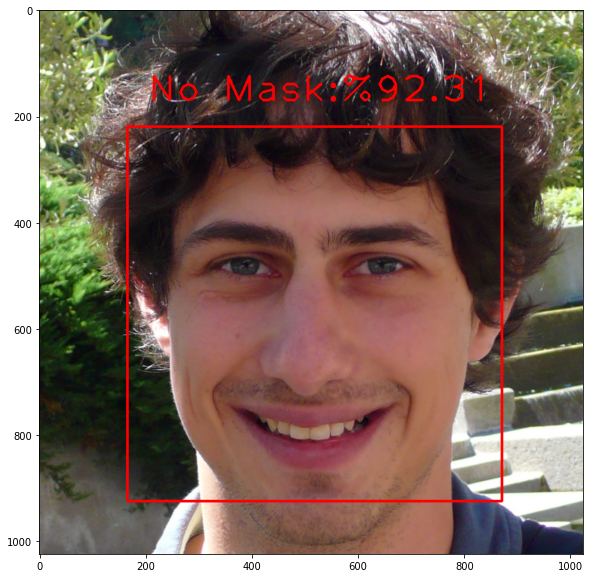

In [ ]:
frame=cv2.imread("/content/drive/MyDrive/without_mask/00221.png")
face = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
faces = face.detectMultiScale(gray, 1.3, 5)
for x, y, w, h in faces:
  roi_face = frame[y:y + h, x:x + w]
  final_array = cv2.resize(roi_face, (224, 224))
  final_array = np.expand_dims(final_array, axis=0)
  final_array = final_array / 255
  predictions = new_model.predict(final_array)
  print("predictions:", predictions)
  if predictions < 0.5:
    status = " Mask:%{}".format(round(predictions[0][0] * 100, 2))
    cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 3)
    cv2.putText(frame, status, (x, y - 45), cv2.FONT_HERSHEY_PLAIN, 5, (0, 0, 255), 5)
  else:
    status = " No Mask:%{}".format(round(predictions[0][0] * 100, 2))
    cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 3)
    cv2.putText(frame, status, (x, y - 45), cv2.FONT_HERSHEY_PLAIN, 5, (0, 0, 255), 3)

frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))

plt.imshow( frame)

# Yeni Bölüm